In [3]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import math
from scipy import stats

sb.set() # set the default Seaborn style for graphics

In [4]:
twitchdata = pd.read_csv('test_data2.csv')
twitchdata.describe()


,id,user_id,game_id,viewer_count,follow_count,total_views
count,2.249800e+04,2.249800e+04,2.217000e+04,22498.000000,2.249800e+04,2.249800e+04
mean,4.457011e+10,2.778053e+08,9.916903e+07,399.233621,5.675228e+04,3.119751e+06
std,2.250975e+09,2.341796e+08,3.614630e+08,3887.617151,4.202539e+05,2.289098e+07
min,3.926852e+10,1.040600e+04,2.070000e+02,8.000000,0.000000e+00,0.000000e+00
25%,4.514331e+10,8.689367e+07,3.298200e+04,24.000000,1.282000e+03,2.396100e+04
50%,4.516681e+10,1.711871e+08,4.970570e+05,42.000000,4.369500e+03,1.023455e+05
75%,4.607995e+10,4.864919e+08,5.127090e+05,104.000000,1.700075e+04,5.201175e+05
max,4.610372e+10,7.862522e+08,2.143824e+09,272883.000000,1.753082e+07,7.602435e+08


In [5]:
twitchdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22498 entries, 0 to 22497
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             22498 non-null  int64  
 1   user_id        22498 non-null  int64  
 2   user_login     22498 non-null  object 
 3   user_name      22498 non-null  object 
 4   game_id        22170 non-null  float64
 5   game_name      22195 non-null  object 
 6   type           22498 non-null  object 
 7   title          22375 non-null  object 
 8   viewer_count   22498 non-null  int64  
 9   started_at     22498 non-null  object 
 10  language       22498 non-null  object 
 11  thumbnail_url  22498 non-null  object 
 12  tag_ids        22491 non-null  object 
 13  is_mature      22498 non-null  bool   
 14  follow_count   22498 non-null  int64  
 15  total_views    22498 non-null  int64  
dtypes: bool(1), float64(1), int64(5), object(9)
memory usage: 2.6+ MB


follow_count    3237
viewer_count    3002
dtype: int64


<AxesSubplot:>

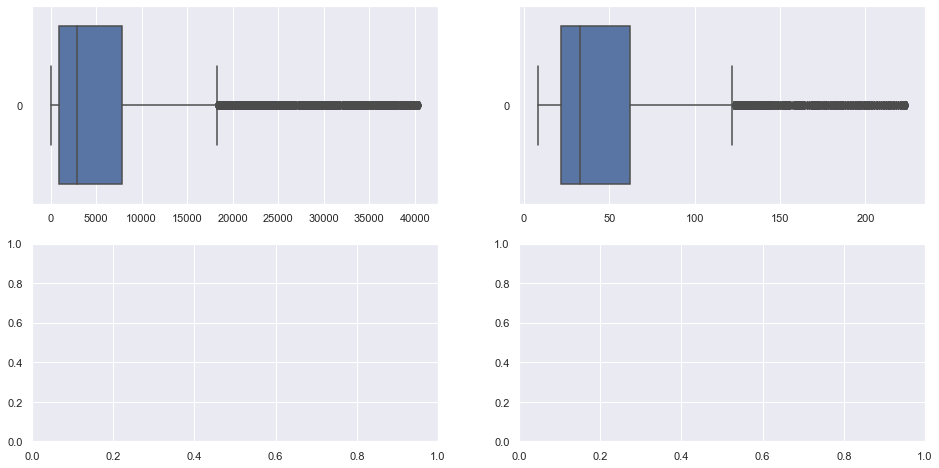

In [4]:
targetData = twitchdata[['follow_count', 'viewer_count']].copy()

# Draw the boxplots
f, axes = plt.subplots(2, 2, figsize=(16, 8))

# Calculate the quartiles
Q1 = targetData.quantile(0.25)
Q3 = targetData.quantile(0.75)

# Rule to identify outliers
rule = ((targetData < (Q1 - 1.5 * (Q3 - Q1))) | (targetData > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
print(rule.sum())

# Calculate the quartiles
Q1 = targetData.quantile(0.25)
Q3 = targetData.quantile(0.75)

# Rule to identify outliers
rule = ((targetData < (Q1 - 1.5 * (Q3 - Q1))) | (targetData > (Q3 + 1.5 * (Q3 - Q1))))

# Check the dataframe rule
rule

# Find the rows where ANY column is True
outliers = rule.any(axis = 1)   # axis 0 is row, 1 is column

# How many points are outliers for the two variables combined?
outliers.value_counts()

# Which row indices correspond to outliers in the dataframe?
outlierindices = outliers.index[outliers == True]
outlierindices

# Remove the outliers based on the row indices obtained above
targetData.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
targetData = targetData.reset_index(drop = True)
#print(targetData)
sb.boxplot(data = targetData["follow_count"], orient = "h", ax = axes[0,0])
sb.boxplot(data = targetData["viewer_count"], orient = "h", ax = axes[0,1])


total_views     3731
viewer_count    3002
dtype: int64


<AxesSubplot:>

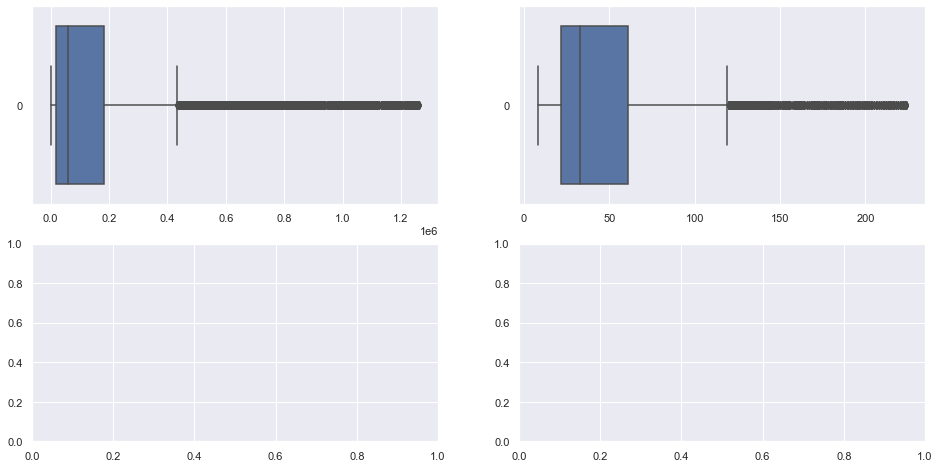

In [5]:
targetData2 = twitchdata[['total_views', 'viewer_count']].copy()

# Draw the boxplots
f, axes = plt.subplots(2, 2, figsize=(16, 8))

# Calculate the quartiles
Q1 = targetData2.quantile(0.25)
Q3 = targetData2.quantile(0.75)

# Rule to identify outliers
rule = ((targetData2 < (Q1 - 1.5 * (Q3 - Q1))) | (targetData2 > (Q3 + 1.5 * (Q3 - Q1))))

# Count the number of outliers
print(rule.sum())

# Calculate the quartiles
Q1 = targetData2.quantile(0.25)
Q3 = targetData2.quantile(0.75)

# Rule to identify outliers
rule = ((targetData2 < (Q1 - 1.5 * (Q3 - Q1))) | (targetData2 > (Q3 + 1.5 * (Q3 - Q1))))

# Check the dataframe rule
rule

# Find the rows where ANY column is True
outliers = rule.any(axis = 1)   # axis 0 is row, 1 is column

# How many points are outliers for the two variables combined?
outliers.value_counts()

# Which row indices correspond to outliers in the dataframe?
outlierindices = outliers.index[outliers == True]
outlierindices

# Remove the outliers based on the row indices obtained above
targetData2.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
targetData2 = targetData2.reset_index(drop = True)
#print(targetData)
sb.boxplot(data = targetData2["total_views"], orient = "h", ax = axes[0,0])
sb.boxplot(data = targetData2["viewer_count"], orient = "h", ax = axes[0,1])


In [29]:
gameName = twitchdata[['game_name','viewer_count']].copy()
gameUniue = []
for item in gameName['game_name']:
    if item not in gameUniue:
        gameUniue.append(item)
        
#print(gameUniue)

gameView = []
number = []
for name in gameUniue:
    temp = 0
    counter = 0
    for count,item in enumerate(gameName['game_name']):
        if item == name:
            temp += gameName['viewer_count'][count]
            counter += 1
    if counter == 0:
        counter += 1
    gameView.append(temp/counter)
    number.append(counter)
#print(gameView)

comb = {'game_name': gameUniue, 'game_views':gameView,'count':number}

df = pd.DataFrame(comb)
print(df)

df.to_csv(index=False)
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
df.to_csv('out.zip', index=False,
          compression=compression_opts)
'''
gameName = twitchdata['game_name']
gameCount = len(gameName.unique())
print("Unique games: ", gameCount)

gameName.value_counts()
avgViewsPG = []
for x in gameName.unique():
    game = twitchdata.loc[twitchdata['game_name']==x]
    if len(game)==0:
        continue
    gameSum=0
    #print(game['viewer_count'].describe())
    for i in game['viewer_count']:
        gameSum += i
    avgViewsPG.append(gameSum/len(game))
print(avgViewsPG)

#jc.describe()
'''

                              game_name   game_views  count
0                         Just Chatting  1032.580672   2411
1                     League of Legends   907.934389    884
2                                Dota 2   967.136929    241
3        Tom Clancy's Rainbow Six Siege   842.929688    128
4                    Grand Theft Auto V   655.526753   1084
...                                 ...          ...    ...
1397                           Syvalion    19.000000      1
1398                   Burnout Paradise    19.000000      1
1399                  Coin Pusher World    18.000000      1
1400                              Noise    19.000000      1
1401  Resident Evil: Code Veronica X HD    18.000000      1

[1402 rows x 3 columns]


'\ngameName = twitchdata[\'game_name\']\ngameCount = len(gameName.unique())\nprint("Unique games: ", gameCount)\n\ngameName.value_counts()\navgViewsPG = []\nfor x in gameName.unique():\n    game = twitchdata.loc[twitchdata[\'game_name\']==x]\n    if len(game)==0:\n        continue\n    gameSum=0\n    #print(game[\'viewer_count\'].describe())\n    for i in game[\'viewer_count\']:\n        gameSum += i\n    avgViewsPG.append(gameSum/len(game))\nprint(avgViewsPG)\n\n#jc.describe()\n'

In [28]:
gameName = twitchdata[['game_name','viewer_count']].copy()

Q1 = gameName.quantile(0.25)
Q3 = gameName.quantile(0.75)

# Rule to identify outliers
rule = ((gameName < (Q1 - 1.5 * (Q3 - Q1))) | (gameName > (Q3 + 1.5 * (Q3 - Q1))))

outliers = rule.any(axis = 1)
outlierindices = outliers.index[outliers == True]
print(outliers)
gameName.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 
gameName = gameName.reset_index(drop = True)
print(gameName)

gameUniue = []

for item in gameName['game_name']:
    if item not in gameUniue:
        gameUniue.append(item)
        
#print(gameUniue)

gameView = []
number = []
for name in gameUniue:
    temp = 0
    counter = 0
    for count,item in enumerate(gameName['game_name']):
        if item == name:
            temp += gameName['viewer_count'][count]
            counter += 1
    if counter == 0:
        counter += 1
    gameView.append(temp/counter)
    number.append(counter)
#print(gameView)

comb = {'game_name': gameUniue, 'game_views':gameView,'count':number}
print(comb)

df = pd.DataFrame(comb)
print(df)
#'''
df.to_csv(index=False)
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
df.to_csv('out.zip', index=False,
          compression=compression_opts)
#'''

C:\Users\Valen\AppData\Local\Temp/ipykernel_19996/1787724581.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  rule = ((gameName < (Q1 - 1.5 * (Q3 - Q1))) | (gameName > (Q3 + 1.5 * (Q3 - Q1))))


0         True
1         True
2         True
3         True
4         True
         ...  
22493    False
22494    False
22495    False
22496    False
22497    False
Length: 22498, dtype: bool
                      game_name  viewer_count
0                   Anime World           218
1                        Crypto           218
2             Teamfight Tactics           218
3                 Just Chatting           218
4                      Lost Ark           217
...                         ...           ...
19491  Final Fantasy XIV Online            18
19492            The Last of Us            18
19493             Just Chatting            18
19494             Pokémon Unite            18
19495                 Destiny 2            17

[19496 rows x 2 columns]
{'game_name': ['Anime World', 'Crypto', 'Teamfight Tactics', 'Just Chatting', 'Lost Ark', 'Sports', nan, 'Call of Duty: Warzone', 'Epic Seven', 'Art', 'Mario Party Superstars', 'Squad', 'Ball 3D', 'League of Legends', 'Pokémon Cry

In [ ]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Recall the Total-HP Dataset
viewercount = pd.DataFrame(targetData['viewer_count'])   # Response
followcount = pd.DataFrame(targetData['follow_count'])         # Predictor

#twitchdata['log(follow_count)'] = round(np.log10(followcount),2)
#followcount = twitchdata['log(follow_count)']
#followcount = followcount.replace(np.nan, 0)
#followcount = followcount.replace(np.inf, 0)
#followcount = followcount.replace(-np.inf, 0)
#followcount = pd.DataFrame(followcount)
pd.set_option("max_rows", None)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(followcount, viewercount, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

In [118]:

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
twitchdata_cat = twitchdata[['language']]
print(twitchdata_cat)
ohe.fit(twitchdata_cat)
twitchdata_cat_ohe = pd.DataFrame(ohe.transform(twitchdata_cat).toarray(), 
                                  columns=ohe.get_feature_names(twitchdata_cat.columns))
twitchdata_cat_ohe.info()


      language
0           fr
1           es
2           es
3           fr
4           ru
...        ...
22493       pt
22494       pt
22495       fr
22496       fr
22497       en

[22498 rows x 1 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22498 entries, 0 to 22497
Data columns (total 33 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   language_ar     22498 non-null  float64
 1   language_bg     22498 non-null  float64
 2   language_cs     22498 non-null  float64
 3   language_da     22498 non-null  float64
 4   language_de     22498 non-null  float64
 5   language_el     22498 non-null  float64
 6   language_en     22498 non-null  float64
 7   language_es     22498 non-null  float64
 8   language_fi     22498 non-null  float64
 9   language_fr     22498 non-null  float64
 10  language_hi     22498 non-null  float64
 11  language_hu     22498 non-null  float64
 12  language_id     22498 non-null  float64
 13  langu

<bound method NDFrame.describe of        viewer_count language  follow_count  total_views
0             31411       en        977072     53903122
1             27026       en        532473    133390064
2             26200       en       2277487    113306358
3             19614       en      17519263    571222232
4             16835       en        336332     21530703
...             ...      ...           ...          ...
10877            18       en          1481        20736
10878            18       en           592        11979
10879            18       en           301         6637
10880            18       en          4785        80640
10881            17       en          1456        33105

[10882 rows x 4 columns]>

In [113]:
# Combining Numeric features with the OHE Categorical features

twitchdata_num = twitchdata[['total_views','follow_count']]
twitchdata_res = twitchdata['viewer_count']
twitchdata_ohe = pd.concat([twitchdata_num, twitchdata_res,twitchdata_cat_ohe], 
                           sort = False, axis = 1).reindex(index=twitchdata_num.index)
twitchdata_ohe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22498 entries, 0 to 22497
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_views     22498 non-null  int64  
 1   follow_count    22498 non-null  int64  
 2   viewer_count    22498 non-null  int64  
 3   language_ar     22498 non-null  float64
 4   language_bg     22498 non-null  float64
 5   language_cs     22498 non-null  float64
 6   language_da     22498 non-null  float64
 7   language_de     22498 non-null  float64
 8   language_el     22498 non-null  float64
 9   language_en     22498 non-null  float64
 10  language_es     22498 non-null  float64
 11  language_fi     22498 non-null  float64
 12  language_fr     22498 non-null  float64
 13  language_hi     22498 non-null  float64
 14  language_hu     22498 non-null  float64
 15  language_id     22498 non-null  float64
 16  language_it     22498 non-null  float64
 17  language_ja     22498 non-null 

In [119]:
# Import the required function from sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Extract Response and Predictors
y = pd.DataFrame(twitchdata['viewer_count'])
X = pd.DataFrame(twitchdata_cat)
# Split the Dataset into random Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Check the sample sizes
print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)

tree_CA_SP_d4 = DecisionTreeClassifier(max_depth = 4)

tree_CA_SP_d4.fit(X_train, y_train)

from sklearn.tree import plot_tree
f = plt.figure(figsize=(24,24))
plot_tree(tree_CA_SP_d4, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["N","Y"])

Train Set : (17998, 1) (17998, 1)
Test Set  : (4500, 1) (4500, 1)


ValueError: could not convert string to float: 'en'